In [1]:
import warnings
import pandas as pd
import sys
import os
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path+"\\python")
from plot import *

# hide warnings
warnings.filterwarnings("ignore")

# show all rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

#### Load listings data set and hold specific columns

In [2]:
from IPython.display import display

# columns that we need
columns = ["id", "neighbourhood", "number_of_reviews", "latitude", "longitude",
           "last_review", "room_type", "property_type", "price"]
# load the data set
listings = pd.read_csv("../data_sets/listings.csv", usecols = columns)

# display the data set
display(listings.shape, listings.head(5))

(11393, 9)

,id,neighbourhood,latitude,longitude,property_type,room_type,price,number_of_reviews,last_review
0,10595,Ambelokipi,37.98863,23.76527,Apartment,Entire home/apt,$117.00,25,2020-03-15
1,10990,Ambelokipi,37.98903,23.76448,Apartment,Entire home/apt,$47.00,34,2020-01-08
2,10993,Ambelokipi,37.98888,23.76473,Apartment,Entire home/apt,$39.00,48,2020-01-17
3,10995,Ambelokipi,37.98903,23.76448,Apartment,Entire home/apt,$42.00,20,2020-02-23
4,27262,Ambelokipi,37.98924,23.76500,Apartment,Entire home/apt,$47.00,17,2020-01-08


#### Drop all rows that have any nan value

In [3]:
# drop rows
listings = listings.dropna()

# display the data set
display(listings.shape, listings.head(5))

(8834, 9)

,id,neighbourhood,latitude,longitude,property_type,room_type,price,number_of_reviews,last_review
0,10595,Ambelokipi,37.98863,23.76527,Apartment,Entire home/apt,$117.00,25,2020-03-15
1,10990,Ambelokipi,37.98903,23.76448,Apartment,Entire home/apt,$47.00,34,2020-01-08
2,10993,Ambelokipi,37.98888,23.76473,Apartment,Entire home/apt,$39.00,48,2020-01-17
3,10995,Ambelokipi,37.98903,23.76448,Apartment,Entire home/apt,$42.00,20,2020-02-23
4,27262,Ambelokipi,37.98924,23.76500,Apartment,Entire home/apt,$47.00,17,2020-01-08


#### Clean prices

In [4]:
# extract prices from the table
price = listings["price"]
prices=[]
# clean the price and convert it to float
for p in price:
    get_price = p[1:]                     # remove '$'
    get_price = get_price.replace(",","") # remove ','
    prices.append(float(get_price))       # string to float
# replace the price column with the new float prices column
listings["price"] = prices

# display the data set
display(listings.shape, listings.head(5))

(8834, 9)

,id,neighbourhood,latitude,longitude,property_type,room_type,price,number_of_reviews,last_review
0,10595,Ambelokipi,37.98863,23.76527,Apartment,Entire home/apt,117.0,25,2020-03-15
1,10990,Ambelokipi,37.98903,23.76448,Apartment,Entire home/apt,47.0,34,2020-01-08
2,10993,Ambelokipi,37.98888,23.76473,Apartment,Entire home/apt,39.0,48,2020-01-17
3,10995,Ambelokipi,37.98903,23.76448,Apartment,Entire home/apt,42.0,20,2020-02-23
4,27262,Ambelokipi,37.98924,23.76500,Apartment,Entire home/apt,47.0,17,2020-01-08


#### Most common room type

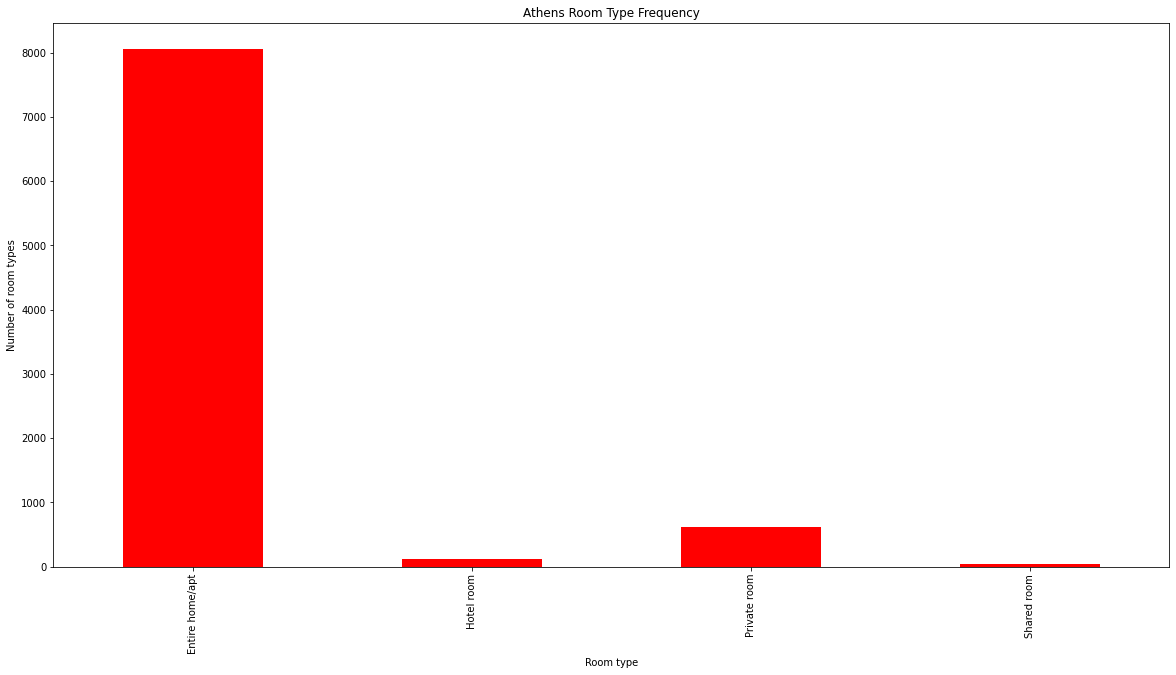

In [5]:
# group up all room types
room_type = listings.groupby("room_type").id.count()
room_type = room_type.reset_index()
room_type = room_type.rename(columns = {"id":"number_of_room_types"})
#display(room_type)

plot_bar(room_type,"room_type","number_of_room_types","Athens Room Type Frequency",
         "Room type","Number of room types","Red")

#### Most expensive room type

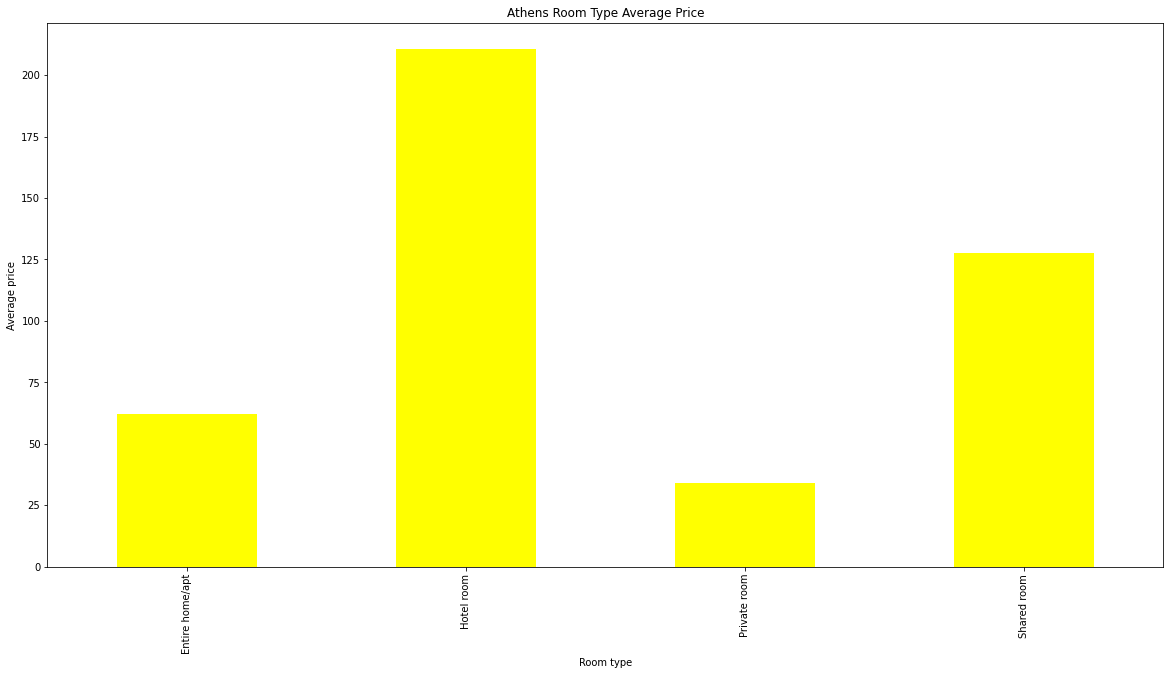

In [6]:
# group up all room types and calculate average price
room_type = listings.groupby("room_type").price.mean()
room_type = room_type.reset_index()
room_type = room_type.rename(columns={"price":"avg_price"})
#display(room_type)

plot_bar(room_type,"room_type","avg_price","Athens Room Type Average Price",
         "Room type","Average price","Yellow")

#### Room type map

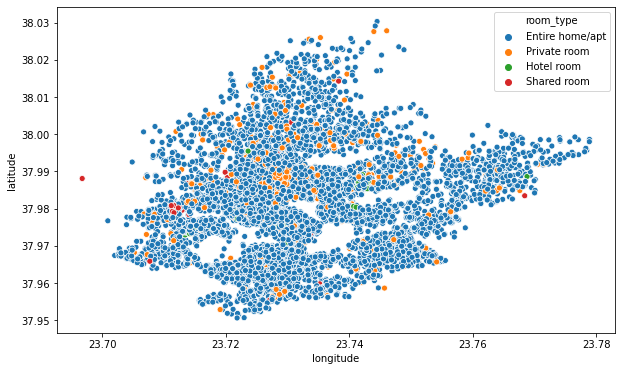

In [7]:
plot_map(listings, "longitude", "latitude", "room_type")

#### Most common property

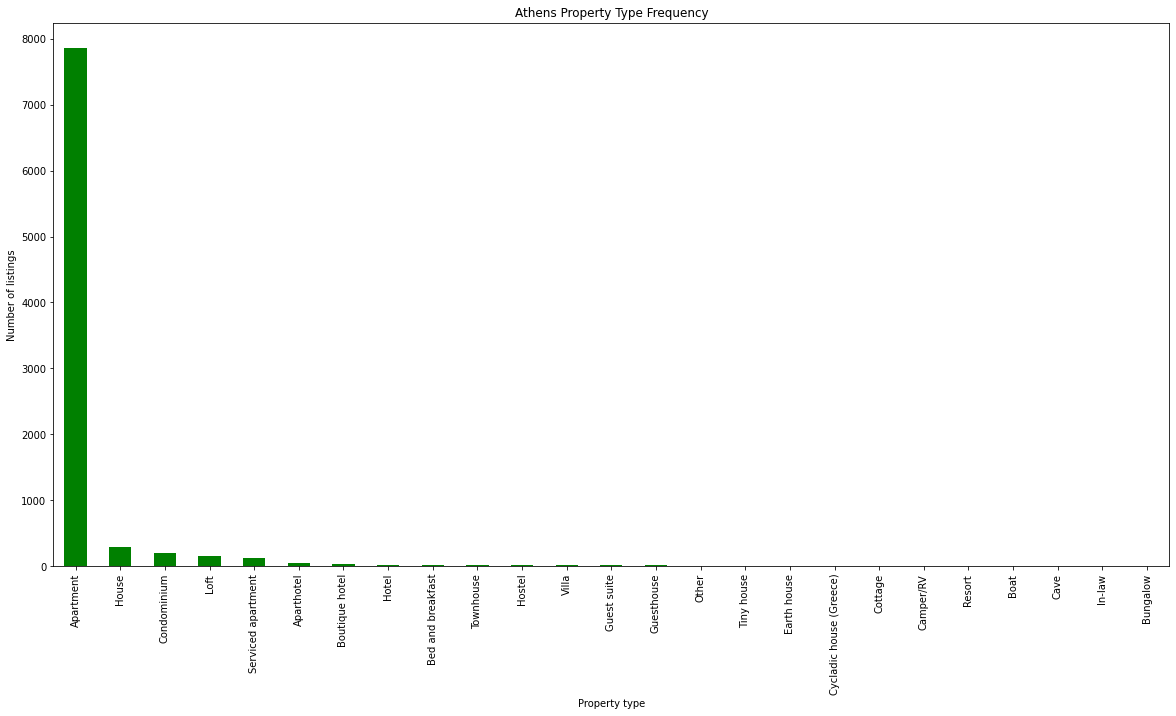

In [8]:
# group by property type
property_type = listings.groupby("property_type").id.count()
property_type = property_type.reset_index()
property_type = property_type.rename(columns={"id":"number_of_listings"})
# sort property type by number of listings
property_type = property_type.sort_values("number_of_listings", ascending = False)
property_type = property_type.reset_index(drop=True)

plot_bar(property_type,"property_type","number_of_listings","Athens Property Type Frequency",
         "Property type","Number of listings","Green")

#### Property map

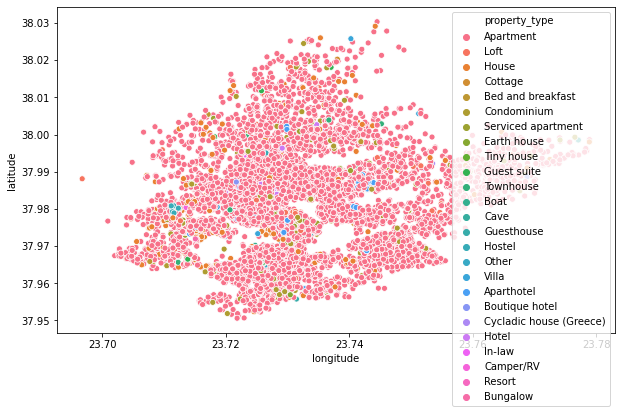

In [9]:
plot_map(listings, "longitude", "latitude", "property_type")

#### Average price for different property type and room type

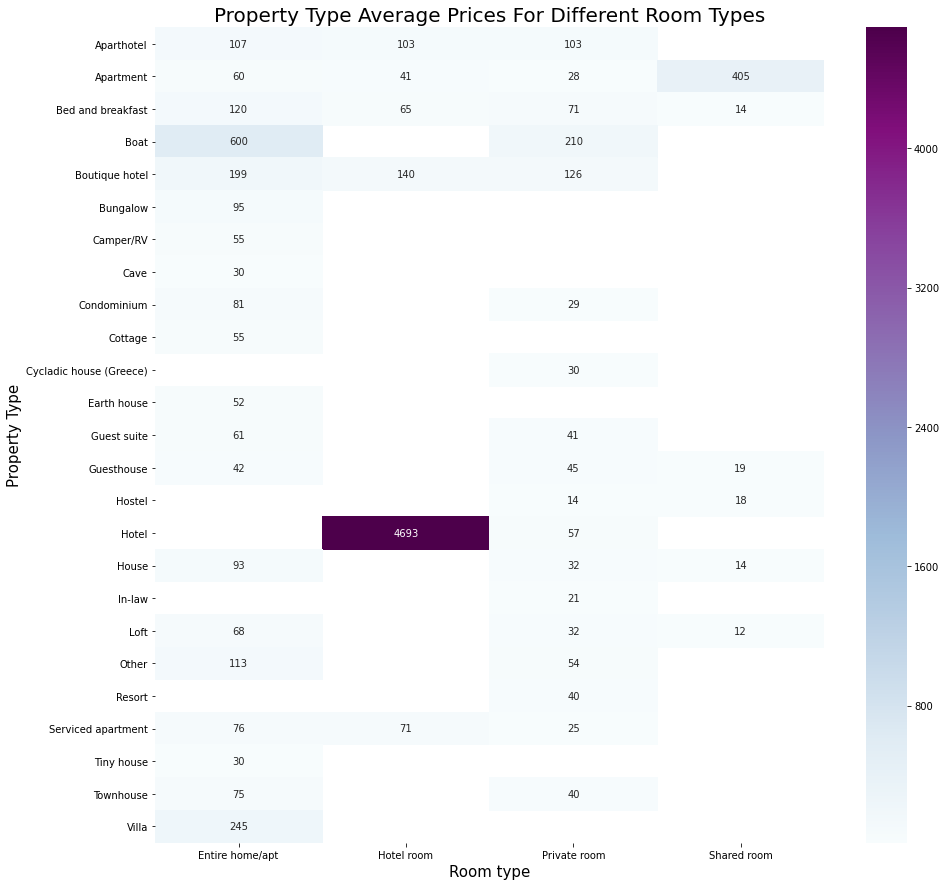

In [10]:
room_and_property = listings.groupby(["property_type", "room_type"]).price.mean()
room_and_property = room_and_property.reset_index()
room_and_property = room_and_property.sort_values("price",ascending = False)
room_and_property = room_and_property.reset_index(drop=True)
#display(room_and_property)

plot_heat_map(listings, ["property_type", "room_type"], "price", "mean", "BuPu",
              "Property Type Average Prices For Different Room Types", "Room type", "Property Type")

#### Neighbourhood with the most comments

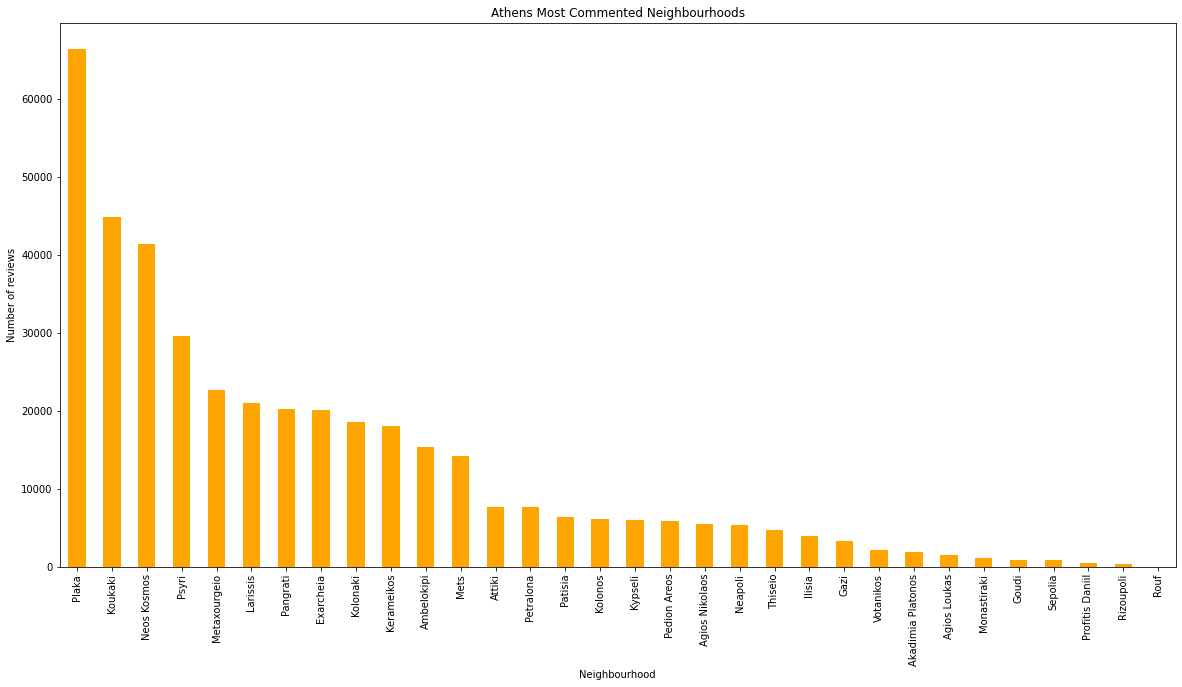

In [11]:
# group by neighbourhood and sum the number of the reviews
neighbourhood_sum_reviews = listings.groupby("neighbourhood")["number_of_reviews"].sum()
neighbourhood_sum_reviews = neighbourhood_sum_reviews.reset_index()
neighbourhood_sum_reviews = neighbourhood_sum_reviews.rename(columns = {"id":"number_of_reviews"})
# then sort by number of reviews
neighbourhood_sum_reviews = neighbourhood_sum_reviews.sort_values("number_of_reviews", ascending = False)
neighbourhood_sum_reviews = neighbourhood_sum_reviews.reset_index(drop = True)
neighbourhood_sum_reviews.sort_values("number_of_reviews", ascending = True)
#display(neighbourhood_sum_reviews)

plot_bar(neighbourhood_sum_reviews,"neighbourhood","number_of_reviews","Athens Most Commented Neighbourhoods",
         "Νeighbourhood","Number of reviews", "Orange")

#### Neighbourhood with the most number of listings

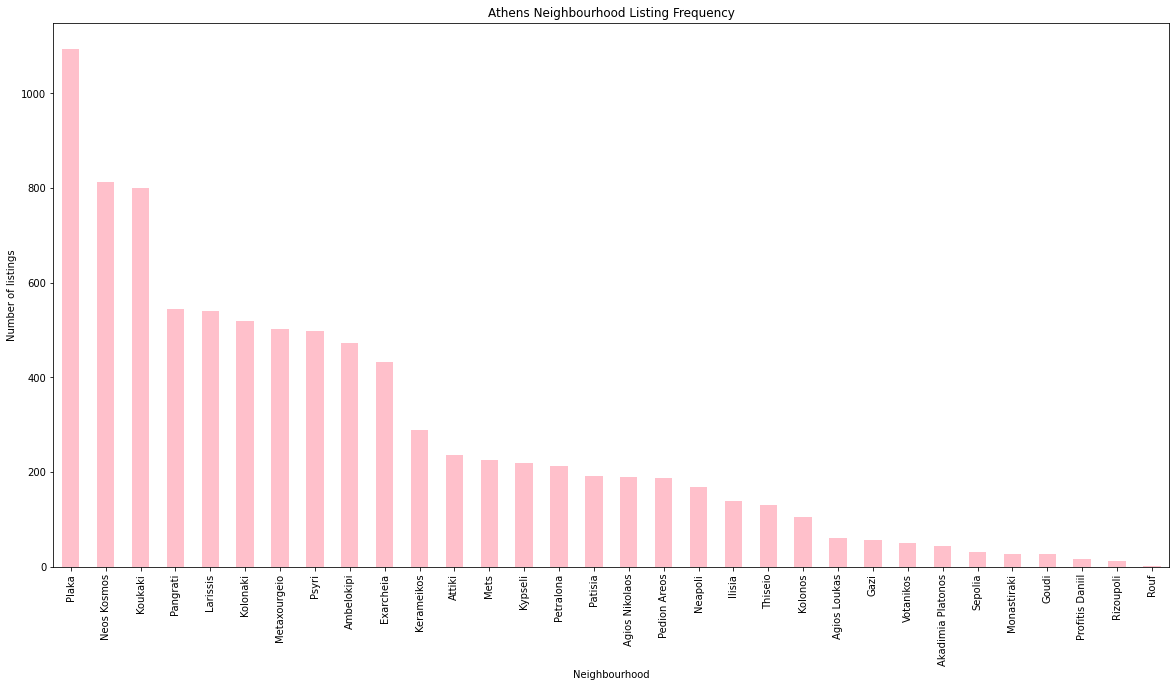

In [12]:
# group up all neighbourhoods
neighbourhood = listings.groupby("neighbourhood").id.count()
neighbourhood = neighbourhood.reset_index()
neighbourhood = neighbourhood.rename(columns={"id":"number_of_listings"})
neighbourhood = neighbourhood.sort_values("number_of_listings", ascending = False)
neighbourhood = neighbourhood.reset_index(drop=True)
#display(neighbourhood)

plot_bar(neighbourhood,"neighbourhood","number_of_listings","Athens Neighbourhood Listing Frequency",
         "Νeighbourhood","Number of listings","Pink")

#### Most common room type in each neighbourhood

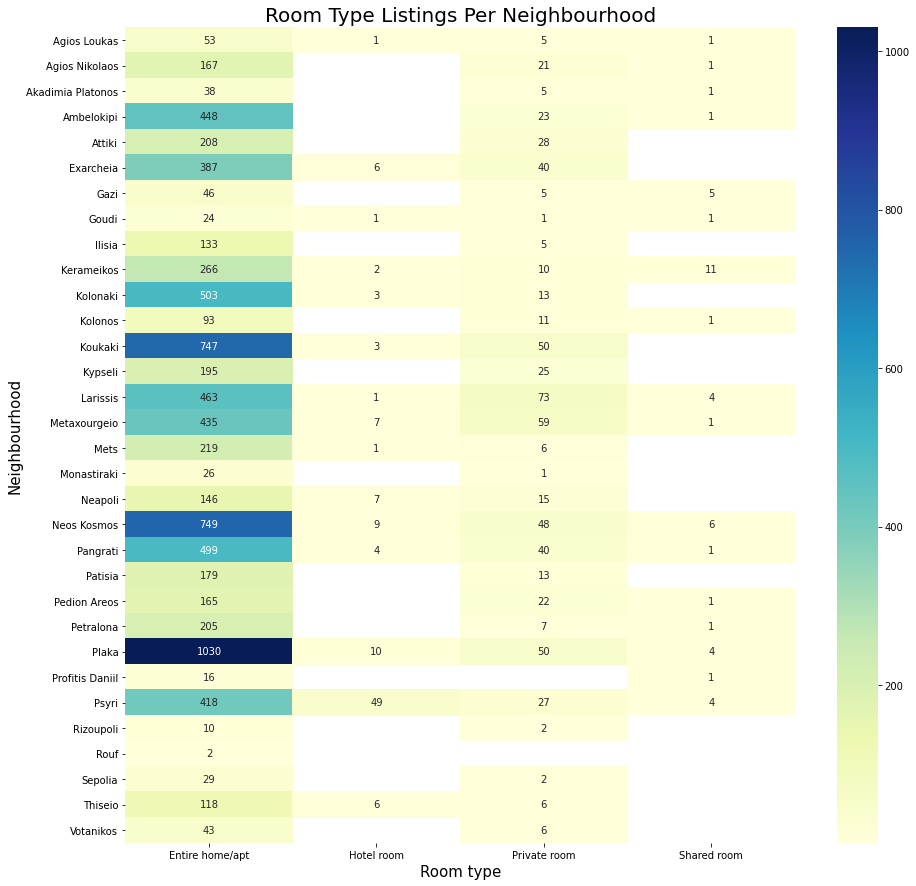

In [13]:
# create a list with tuples: (neighbourhood, room_type, number_of_rooms)
neighbourhood_data = []
# group by neighbourhood
neighbourhood_data_frame = listings.groupby("neighbourhood")
# for each neighbourhood find the most frequenclty type of room and push it to the list
for neigh_name, neigh_data in neighbourhood_data_frame:
    neigh_data = neigh_data.groupby("room_type").id.count()
    neigh_data = neigh_data.reset_index()
    neigh_data = neigh_data.rename(columns={"id":"number_of_room_types"})
    neighbourhood_data.append((neigh_name, neigh_data["room_type"].iloc[0], neigh_data["number_of_room_types"].iloc[0]))
# convert list to dataframe
most_freq_room_type_for_neigh = pd.DataFrame(neighbourhood_data, columns =["neighbourhood", "room_type", "number_of_rooms"])
#display(most_freq_room_type_for_neigh)
    
plot_heat_map(listings, ["neighbourhood", "room_type"], "id", "count", "YlGnBu",
              "Room Type Listings Per Neighbourhood", "Room type", "Neighbourhood")

#### Neighbourhood map

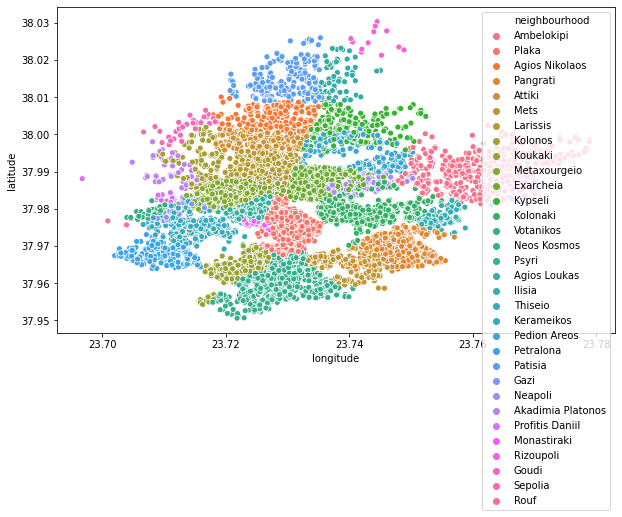

In [14]:
plot_map(listings, "longitude", "latitude", "neighbourhood")

#### Folium map

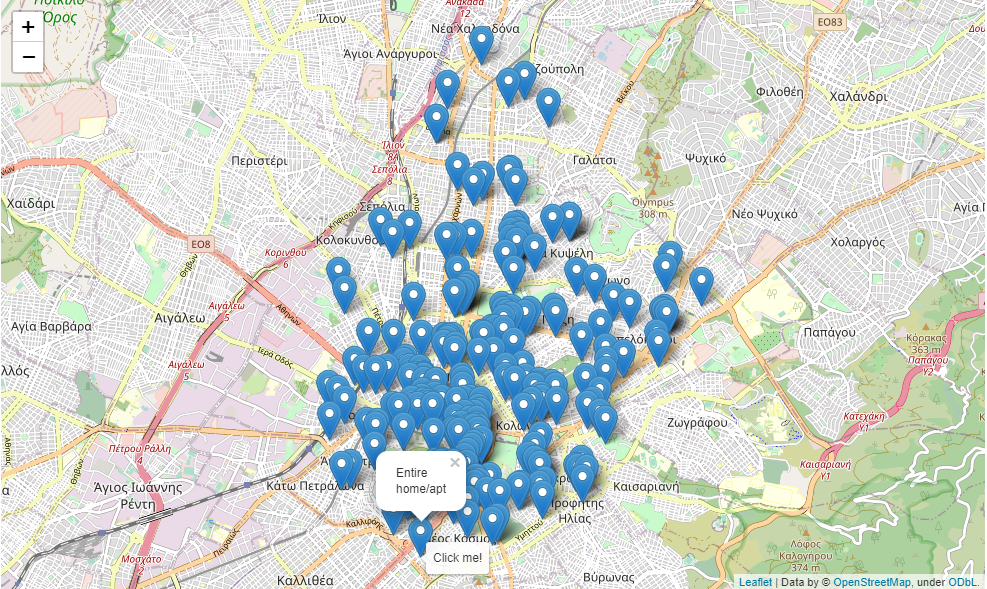

In [15]:
import folium
from IPython.display import Image

# Athens location
folium_map = folium.Map(location = [37.983810, 23.727539], zoom_start = 14)
# get latitude, longitude and room_type
latitude = listings["latitude"].tolist()
longitude = listings["longitude"].tolist()
room_type = listings["room_type"].tolist()
# add 250 marker locations
for la,lo,rt in zip(latitude[0:250],longitude[0:250],room_type[0:250]):
    folium.Marker(location = [la,lo], popup = rt, tooltip = "Click me!").add_to(folium_map)
# plot map
#display(folium_map)
# plot image
Image("../resource/folium_map.png")